Importing all possible libraries and functions you require to train an LSTM model.

In [ ]:
import datetime as dt
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional

In [ ]:
while(True):
  try:
    print("Please Input the company")
    comp = input()
    print("Start Period YYYY/MM/DD")
    str1 = input()
    print("End Period YYYY/MM/DD")
    str2 = input()
    start = dt.datetime(int(str1[0:4]),int(str1[5:7]),int(str1[8:]))
    end = dt.datetime(int(str2[0:4]),int(str2[5:7]),int(str2[8:]))
  except:
    print('Please Input Correct Details') 
  if('start' in locals() and 'end' in locals()):
    break

Please Input the company
MSFT
Start Period YYYY/MM/DD
1987/12/12
End Period YYYY/MM/DD
2021/06/08


In [ ]:
try:
  stk_data = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/'+comp+'?period1='+start.strftime('%s')+'&period2='+end.strftime('%s')+'&interval=1d&events=history&includeAdjustedClose=true')
  stk_data.head()
except:
  print("Bad request")

In [ ]:
stk_data['Date'] = stk_data.index
complete_set = stk_data.iloc[:,1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(complete_set)
X_train = []
Y_train = []
for i in range(60, int(len(training_set_scaled)-20)):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i:i+20, 0]) 
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
Y_train = np.reshape(Y_train,(Y_train.shape[0],Y_train.shape[1],1))
print(X_train.shape,Y_train.shape)

(8357, 60, 1) (8357, 20, 1)


In [ ]:
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1))))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 40, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 20))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, Y_train, epochs = 20, batch_size = 30)

Epoch 1/20
279/279 [==============================] - 90s 176ms/step - loss: 0.0076
Epoch 2/20
279/279 [==============================] - 48s 172ms/step - loss: 3.8720e-04
Epoch 3/20
279/279 [==============================] - 48s 172ms/step - loss: 3.8503e-04
Epoch 4/20
279/279 [==============================] - 48s 171ms/step - loss: 4.9190e-04
Epoch 5/20
279/279 [==============================] - 48s 171ms/step - loss: 3.1102e-04
Epoch 6/20
279/279 [==============================] - 46s 166ms/step - loss: 3.0207e-04
Epoch 7/20
279/279 [==============================] - 47s 169ms/step - loss: 3.5290e-04
Epoch 8/20
279/279 [==============================] - 50s 179ms/step - loss: 2.8987e-04
Epoch 9/20
279/279 [==============================] - 53s 190ms/step - loss: 3.0491e-04
Epoch 10/20
279/279 [==============================] - 53s 190ms/step - loss: 2.5401e-04
Epoch 11/20
279/279 [==============================] - 52s 188ms/step - loss: 2.8364e-04
Epoch 12/20
279/279 [=============

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 60, 120)           29760     
_________________________________________________________________
dropout (Dropout)            (None, 60, 120)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            43440     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 60)            2

In [ ]:
print(regressor.predict(X_train[0].reshape(1,-1,1)).shape)

(1, 20)


In [ ]:
def stockBuySell(inputs, price, n):
    plt.figure(figsize=(20,10))
    plt.plot(inputs, color = 'green', label = 'MSFT')
    plt.plot(price, color = 'red', label = 'Predicted MSFT Stock Price')
    plt.title('MSFT Stock Price Prediction')
    plt.xlabel('Trading Day')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
    i = 0
    earnings = 0
    total_invest = 0
    while (i < (n - 1)):
        while ((i < (n - 1)) and (price[i + 1] <= price[i])):
            i += 1
        if (i == n - 1):
            break
        buy = i
        i += 1
        while ((i < n) and (price[i] >= price[i - 1])):
            i += 1
        sell = i - 1
        prof_per = float((price[sell]-price[buy])/price[buy])*100
        if (prof_per > 1):
          print("Buy on day: ",buy,"\t", "Sell on day: ",sell,"\t","Anticipated Profit :",float((price[sell]-price[buy])/price[buy])*100,"%", " Actual Profit", float((inputs[sell]-inputs[buy])/inputs[buy])*100)
          earnings += inputs[sell]-inputs[buy]
          total_invest += price[buy]
    print("Total Earnings = $",int(earnings)," With a total investment of $",int(total_invest))


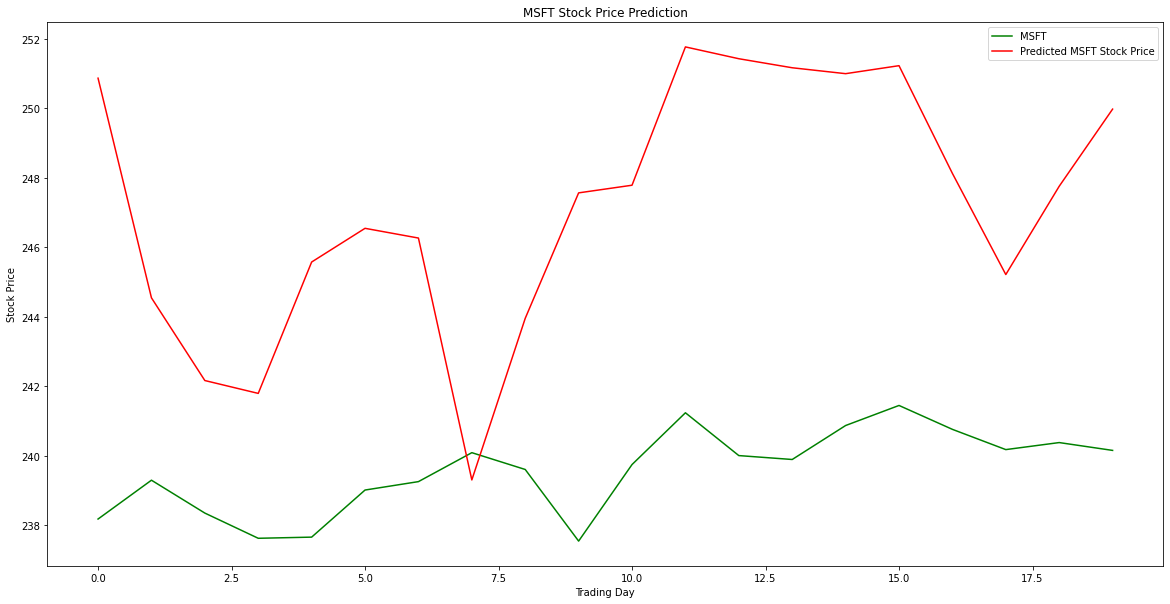

Buy on day:  3 	 Sell on day:  5 	 Anticipated Profit : 1.9644333916736967 %  Actual Profit 0.5841954611241817
Buy on day:  7 	 Sell on day:  11 	 Anticipated Profit : 5.206638295153883 %  Actual Profit 0.47803488560020924
Buy on day:  17 	 Sell on day:  19 	 Anticipated Profit : 1.9411120547218466 %  Actual Profit -0.009542193583911285
Total Earnings = $ 2  With a total investment of $ 726


In [ ]:
stockBuySell(sc.inverse_transform(regressor.predict(training_set_scaled[-80:-20].reshape(1,-1,1))).reshape(-1,1),sc.inverse_transform(training_set_scaled[-20:]).reshape(-1,1),20)
